In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os
import statsmodels.api as sm
#from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# new imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [3]:
pd.options.display.max_columns = None

In [4]:
#R2 Function
def OSR2(y_actual,y_pred,baseline):
    residuals = y_actual - y_pred
    SSR = np.sum((residuals)^2)
    SST = np.sum((y_actual - baseline)^2)
    R2 = 1 - SSR / SST
    return(R2) 

In [5]:
#Load Raw Data
file_path = 'C:\\Users\\rafma\\Python\\46889 Capstone\\Cleaned_GenericWellData.csv'
Well_Data = pd.read_csv(file_path)

In [6]:
os.chdir("C:\\Users\\rafma\\Python\\46889 Capstone")

In [7]:
#Andrew Data Cleaning Code 

#Identifying missing values

#missing_values = data.isnull().sum()
#missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
#print("\nColumns with missing values and their count:")
#print(missing_values)

#Fill missing values with median for numerical columns and mode for categorical columns

#for column in data.columns:
#     if data[column].dtype == 'float64' or data[column].dtype == 'int64':
#         data[column].fillna(data[column].median(), inplace=True)
#     elif data[column].dtype == 'object':
#         data[column].fillna(data[column].mode()[0], inplace=True)

#data = data.drop_duplicates()

#Blank Cell Count
blank_cells = Well_Data.isnull().sum().sum()
blank_cells

0

In [8]:
# Convert Dates in Date Columns
#Well_Data['InitialProductionDate'] = pd.to_datetime(Well_Data['InitialProductionDate'])
#start_date = Well_Data['InitialProductionDate'].min()
#Well_Data['days_since_start'] = (Well_Data['InitialProductionDate'] - start_date).dt.days

In [9]:
#Remove Date fields from training data set
#Keep 'InitialProductionYear' column?
#Reponse variable limited to only first 3 months production output oil
y = Well_Data['First3MonthOil_BBLPer1000FT']
x = Well_Data.drop(['Well Index', 'InitialProductionDate', 'DrillingStartDate','InitialProductionYear', 'DrillingCompletionDate', 'YearOfDrilling', 'InitialProductionMonth','First36MonthWater_BBL', 'First3MonthGas_MCF', 'First3MonthGas_MCFPer1000FT', 'First3MonthProd_MCFE', 'First3MonthProd_MCFEPer1000FT', 'First3MonthOil_BBL', 'First3MonthOil_BBLPer1000FT', 'First3MonthWater_BBL', 'First6MonthProd_BOE', 'First6MonthProd_BOEPer1000FT', 'First6MonthGas_MCF', 'First6MonthGas_MCFPer1000FT', 'First6MonthProd_MCFE', 'First6MonthProd_MCFEPer1000FT', 'First6MonthOil_BBL', 'First6MonthOil_BBLPer1000FT', 'First6MonthWater_BBL', 'First9MonthProd_BOE', 'First9MonthProd_BOEPer1000FT', 'First9MonthGas_MCF', 'First9MonthGas_MCFPer1000FT', 'First9MonthProd_MCFE', 'First9MonthProd_MCFEPer1000FT', 'First9MonthOil_BBL', 'First9MonthOil_BBLPer1000FT', 'First9MonthWater_BBL', 'First12MonthProd_BOE', 'First12MonthProd_BOEPer1000FT', 'First12MonthGas_MCF', 'First12MonthGas_MCFPer1000FT', 'First12MonthProd_MCFE', 'First12MonthProd_MCFEPer1000FT', 'First12MonthOil_BBL', 'First12MonthOil_BBLPer1000FT', 'First12MonthWater_BBL', 'First36MonthProd_BOE', 'First36MonthProd_BOEPer1000FT', 'First36MonthGas_MCFPer1000FT', 'First36MonthProd_MCFE', 'First36MonthProd_MCFEPer1000FT', 'First36MonthOil_BBLPer1000FT', 'First36MonthWaterProductionBBLPer1000Ft', 'PeakProd_BOE', 'PeakProd_BOEPer1000FT', 'PeakGas_MCF', 'PeakGas_MCFPer1000FT', 'PeakProd_MCFE', 'PeakProd_MCFEPer1000FT', 'PeakOil_BBL', 'PeakOil_BBLPer1000FT', 'PeakWater_BBL', 'CumProd_BOE', 'CumProd_BOEPer1000FT', 'CumGas_MCF', 'CumGas_MCFPer1000FT', 'CumProd_MCFE', 'CumProd_MCFEPer1000FT', 'CumOil_BBL', 'CumOil_BBLPer1000FT', 'CumWater_BBL', 'First3MonthProd_BOEPer1000FT'], axis = 1)

In [10]:
x = pd.get_dummies(x, columns=['OilTest_Method'])
for col in x.columns:
    if x[col].dtype == 'bool':
        x[col] = x[col].astype(int)

In [11]:
#Convert float data type to numeric and remove comma separators of numbers
for col in x.columns:
    if x[col].dtype == 'float':
        x[col] = x[col].astype(int)
        
for col in x.columns:
    if x[col].dtype == 'object':  # Check if the column contains string values
        # Remove commas and convert to numeric, setting errors to 'coerce' to handle non-numeric strings
        x[col] = pd.to_numeric(x[col].str.replace(',', ''), errors='coerce')

In [12]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [13]:
x_train.head(20)

,TrueVerticalDepth_FT,MeasuredDepth_FT,UpperPerforation_FT,LowerPerforation_FT,PerforationInterval_FT,LateralLength_FT,FractureStages,AvgStageSpacing_FT,ProppantLoad_LBSPerGAL,ProppantIntensity_LBSPerFT,TotalProppant_LBS,TotalWaterPumped_GAL,WaterIntensity_GALPerFT,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,AcidVolume_BBL,DrillingDuration_DAYS,ProductionMonthsCount,OilTest_Method_FLOWING,OilTest_Method_GAS LIFT,OilTest_Method_PUMPING
1740,9332,17205,9654,17062,7408,7650,39,215,1,1134.0,8401679.0,7931120.0,1071.0,188836.0,25,830,1,94,0,1,0
2021,9747,18120,10231,18039,7808,8043,39,215,0,1842.0,14385335.0,18831666.0,2412.0,448373.0,57,417,20,88,0,0,1
7202,8674,16591,8728,16428,7700,7582,39,215,1,2711.0,20874851.0,20671098.0,2685.0,492169.0,64,6,22,38,0,1,0
3162,7669,17875,7850,17771,9921,9899,39,215,1,2028.0,20120010.0,19403874.0,1956.0,461997.0,47,11,30,72,0,0,1
1381,9258,19429,9518,19325,9807,10014,39,215,0,1020.0,10001484.0,15673100.0,1598.0,373169.0,38,153,17,100,0,1,0
6788,8784,18906,9064,18845,9781,9707,39,215,0,1704.0,16663472.0,18983000.0,1941.0,451976.0,46,190,14,45,0,1,0
4144,9493,17663,9903,17555,7652,7898,39,215,0,1599.0,12239117.0,14471856.0,1891.0,344568.0,45,5574,20,64,0,0,1
625,9453,16895,10003,16803,6800,7109,39,215,1,1287.0,8749213.0,7052510.0,1037.0,167917.0,25,1449,9,111,0,0,1
7433,8803,19045,9101,18931,9830,9885,39,215,0,2004.0,15059017.0,10000000.0,2001.0,238095.0,46,417,17,36,0,0,1
7012,6938,15223,7454,15153,7699,7962,39,215,1,2349.0,18088116.0,10754600.0,1397.0,256062.0,33,248,19,41,0,0,1


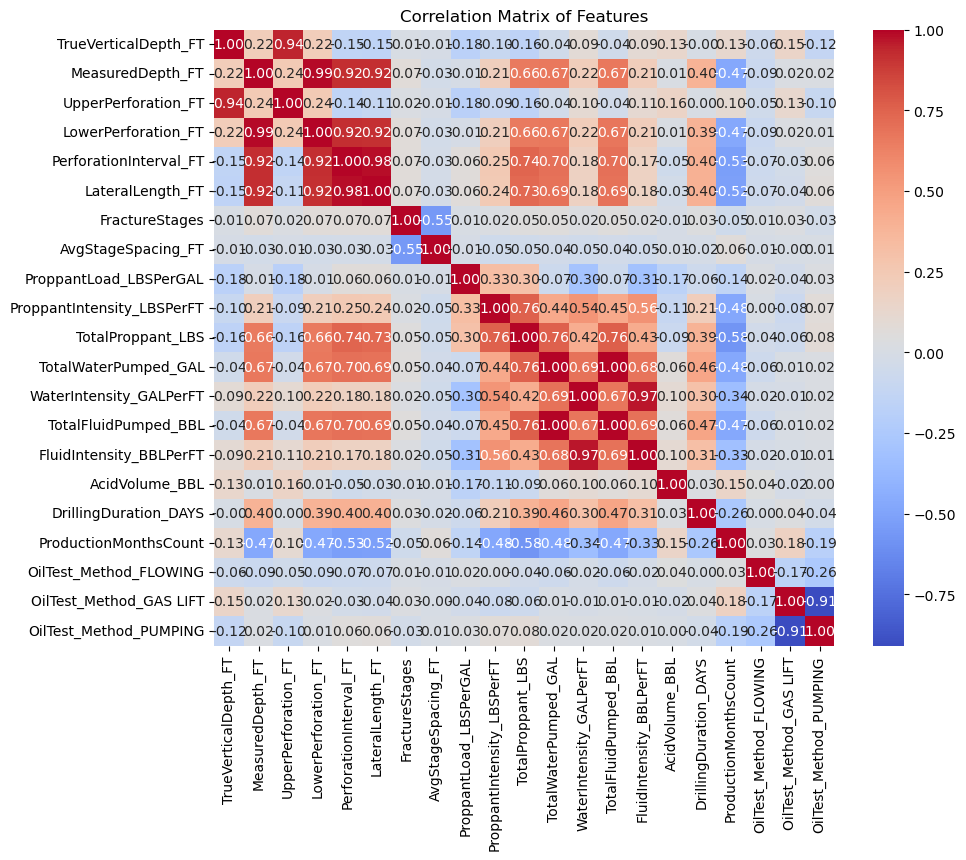

In [14]:
# Correlation Matrix
corr_matrix = x_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [15]:
#Variance Inflation Factor Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term for the intercept
X = add_constant(x_train)  # df is your features DataFrame

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                       Feature          VIF
0                        const     0.000000
1         TrueVerticalDepth_FT    15.826591
2             MeasuredDepth_FT   185.232162
3          UpperPerforation_FT    28.722938
4          LowerPerforation_FT    86.890246
5       PerforationInterval_FT   164.561027
6             LateralLength_FT    66.718384
7               FractureStages     1.455470
8           AvgStageSpacing_FT     1.452454
9       ProppantLoad_LBSPerGAL     2.083245
10  ProppantIntensity_LBSPerFT     9.355125
11           TotalProppant_LBS    16.833694
12        TotalWaterPumped_GAL   969.752502
13     WaterIntensity_GALPerFT   123.466496
14        TotalFluidPumped_BBL  1011.575001
15     FluidIntensity_BBLPerFT   131.614341
16              AcidVolume_BBL     1.118902
17       DrillingDuration_DAYS     1.318590
18       ProductionMonthsCount     1.833536
19      OilTest_Method_FLOWING          inf
20     OilTest_Method_GAS LIFT          inf
21      OilTest_Method_PUMPING  

C:\Users\rafma\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\rafma\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [16]:
#scaling variables of ridge regression
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)  # Assuming X is your features DataFrame

In [17]:
#Linear Regression Model
lr_mod = LinearRegression()
lr_mod.fit(x_train, y_train)

LinearRegression()

In [18]:
x_train.to_excel('well_training_set.xlsx', index=False)

In [19]:
y_pred_lr_mod = lr_mod.predict(x_test)  

In [20]:
print("Linear Regression train R2: ", lr_mod.score(x_train, y_train))
print("Linear Regression test R2: ", lr_mod.score(x_test, y_test))
# A more accurate OSR2
# print("Linear Regression test R2: ", OSR2(y_test.values, y_pred_lr_mod, np.mean(y_train)))

Linear Regression train R2:  0.11379457002332494
Linear Regression test R2:  0.11795884662659095


In [21]:
#Regualrize by Scvaling Data

In [22]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [23]:
std_x_train = x_train.copy()
std_x_test = x_test.copy()

In [24]:
std_train_array = scaler.transform(std_x_train)
std_test_array = scaler.transform(std_x_test)

In [25]:
# transforming the arrays back into a dataframe while preserving the column names
std_x_train[:] = std_train_array
std_x_test[:] = std_test_array

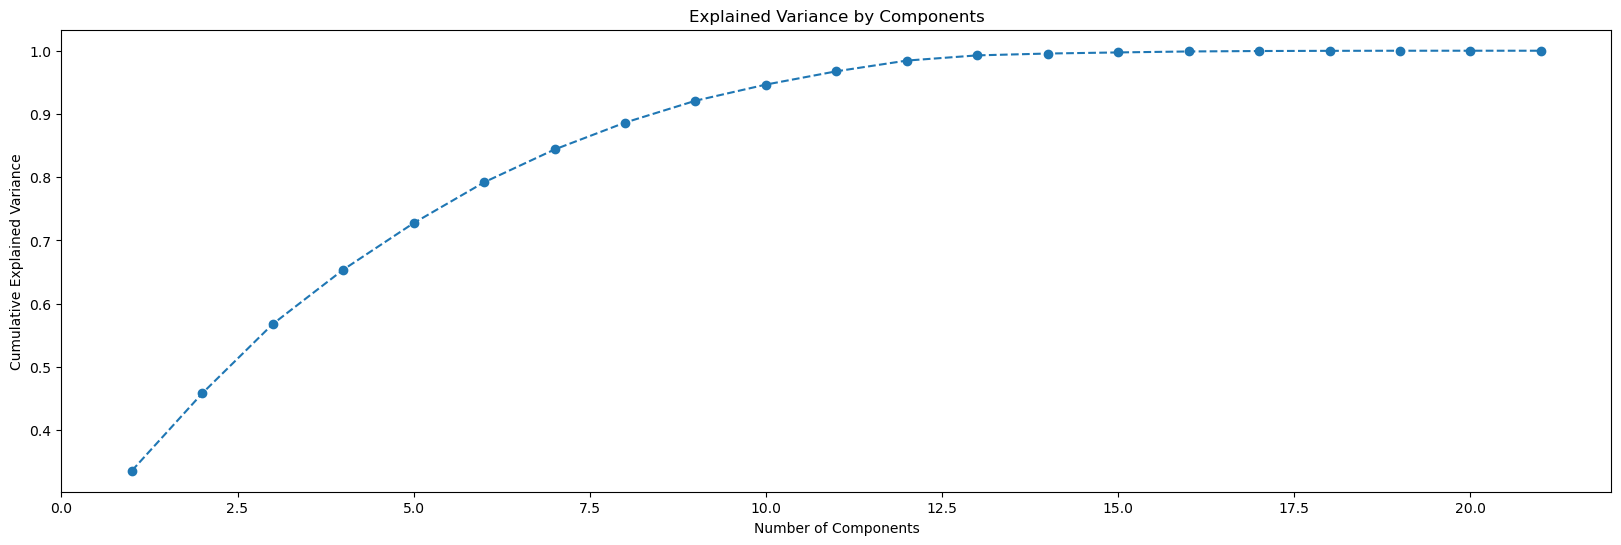

[3.36031816e-01 1.22433786e-01 1.09411624e-01 8.59708369e-02
 7.36798843e-02 6.44890183e-02 5.18700964e-02 4.25030111e-02
 3.45643533e-02 2.55370031e-02 2.10054731e-02 1.69354828e-02
 8.21604131e-03 2.90574264e-03 1.75250052e-03 1.51796610e-03
 7.06216524e-04 2.86624413e-04 1.60855673e-04 2.16674904e-05
 5.94836771e-33]


In [26]:
#PCA Analysis
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=len(x_train.columns))
pca.fit(std_x_train[:])

# Plot the explained variance to see how many components are needed to capture most of the variance
plt.figure(figsize=(20, 6))
plt.plot(range(1, len(x_train.columns) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print(pca.explained_variance_ratio_)

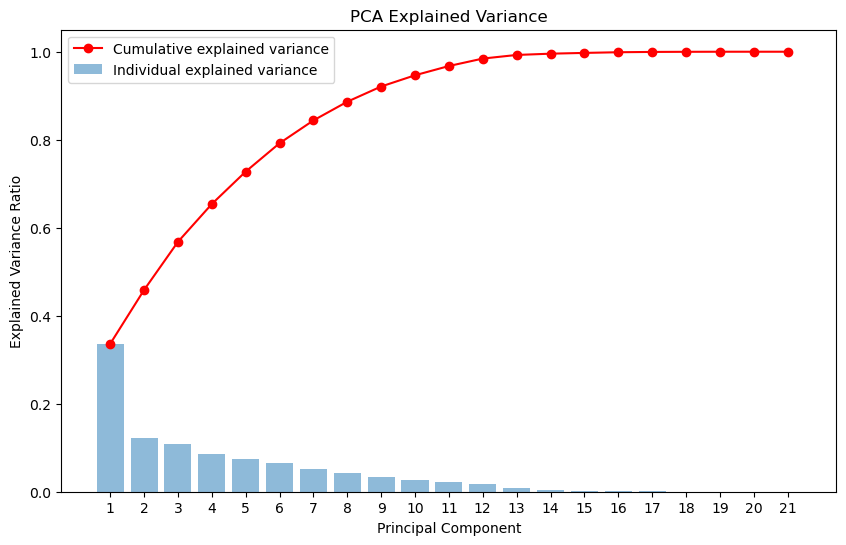

In [27]:
#PCA Analysis
import matplotlib.pyplot as plt
import numpy as np

# Example data: Explained variance ratio for each principal component
explained_variance_ratio = np.array(pca.explained_variance_ratio_)

# Cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Number of components
components = range(1, len(explained_variance_ratio) + 1)

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance_ratio, alpha=0.5, label='Individual explained variance')
plt.plot(components, cumulative_explained_variance, marker='o', linestyle='-', color='r', label='Cumulative explained variance')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.xticks(components)
plt.legend(loc='best')

plt.show()

In [28]:
# # Correlation Matrix
# corr_matrix = std_x_train[:].corr()

# # Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
# plt.title("Correlation Matrix of Features")
# plt.show()

In [29]:
lambdas = np.logspace(-5, 5, 120000)

In [30]:
ridge_mod_cv = RidgeCV(alphas=lambdas, store_cv_values=True)

In [31]:
ridge_mod_cv.fit(std_x_train, y_train)

RidgeCV(alphas=array([1.00000000e-05, 1.00019190e-05, 1.00038384e-05, ...,
       9.99616306e+04, 9.99808135e+04, 1.00000000e+05]),
        store_cv_values=True)

In [32]:
print("The best choice of lambda is: ", ridge_mod_cv.alpha_)

The best choice of lambda is:  70.8582496159215


In [33]:
y_pred_ridge_mod_cv = ridge_mod_cv.predict(std_x_test)

In [34]:
print("Ridge Regression train R2: ", ridge_mod_cv.score(std_x_train, y_train))
print("Ridge Regression test R2: ", ridge_mod_cv.score(std_x_test, y_test))
# A more accurate OSR2
# print("Ridge Regression test R2: ", OSR2(y_test.values, y_pred_ridge_mod_cv, np.mean(y_train)))

Ridge Regression train R2:  0.11345986571154465
Ridge Regression test R2:  0.11750508967630047


In [35]:
feature_names = x_train.columns
coefficients = ridge_mod_cv.coef_

In [36]:
# Create a DataFrame for easier handling
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

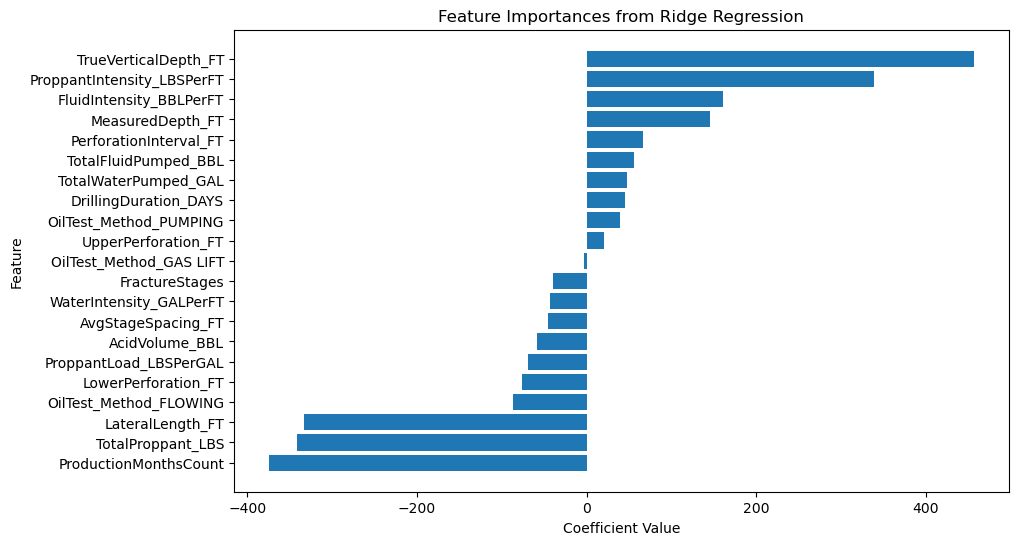

<Figure size 640x480 with 0 Axes>

In [37]:
# Set figure size and title
plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Ridge Regression')

# Create a bar plot of feature importances
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')


# Show plot
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients at the top
plt.show()
plt.savefig('C:/Users/rafma/Python/46889 Capstone/First3MonthOil_BBLPer1000FT_Oil_BBL.png')